In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

In [74]:
df = pd.read_csv(r'../data/H2.csv')

In [75]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [76]:
df = df.sort_index(axis = 1)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ADR                          79330 non-null  float64
 1   Adults                       79330 non-null  int64  
 2   Agent                        79330 non-null  object 
 3   ArrivalDateDayOfMonth        79330 non-null  int64  
 4   ArrivalDateMonth             79330 non-null  object 
 5   ArrivalDateWeekNumber        79330 non-null  int64  
 6   ArrivalDateYear              79330 non-null  int64  
 7   AssignedRoomType             79330 non-null  object 
 8   Babies                       79330 non-null  int64  
 9   BookingChanges               79330 non-null  int64  
 10  Children                     79326 non-null  float64
 11  Company                      79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  CustomerType    

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ADR,79330.0,105.304465,43.602954,0.0,79.2,99.9,126.0,5400.0
Adults,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
ArrivalDateDayOfMonth,79330.0,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
ArrivalDateWeekNumber,79330.0,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
ArrivalDateYear,79330.0,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
Babies,79330.0,0.004941,0.084323,0.0,0.0,0.0,0.0,10.0
BookingChanges,79330.0,0.187369,0.608620,0.0,0.0,0.0,0.0,21.0
Children,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
DaysInWaitingList,79330.0,3.226774,20.870890,0.0,0.0,0.0,0.0,391.0
IsCanceled,79330.0,0.417270,0.493111,0.0,0.0,0.0,1.0,1.0


# Data Analysis

### Merging Date Columns

In [80]:
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May':5, 'June': 6, 'July': 7, 'August': 8,
 'September': 9, 'October': 10, 'November': 11, 'December': 12}


In [81]:
df = df.replace({'ArrivalDateMonth' : months})

In [82]:
df['ArrivalDate'] = df['ArrivalDateDayOfMonth'].astype(str) + '/' + df['ArrivalDateMonth'].astype(str) + '/' +  df['ArrivalDateYear'].astype(str)

In [83]:
pd.DataFrame(df['ArrivalDate'])

,ArrivalDate
0,1/7/2015
1,1/7/2015
2,1/7/2015
3,1/7/2015
4,2/7/2015
...,...
79325,30/8/2017
79326,31/8/2017
79327,31/8/2017
79328,31/8/2017


In [84]:
df.drop(['ArrivalDateDayOfMonth', 'ArrivalDateMonth', 'ArrivalDateYear'], axis = 1, inplace = True)

## Duplicates

In [85]:
df.duplicated().sum()

25902

In [86]:
df.drop_duplicates(inplace= True)

In [87]:
df.duplicated().sum()

0

## Null Values

In [88]:
df['Children'].isna().sum()

4

In [89]:
df['Children'].replace({np.nan:0}, inplace=True)

In [90]:
df['Country'].isna().sum()

6

In [91]:
df.dropna(axis = 0, inplace= True)

In [92]:
df['Country'].isna().sum()

0

## Data Pre-Processing

In [93]:
df.columns

Index(['ADR', 'Adults', 'Agent', 'ArrivalDateWeekNumber', 'AssignedRoomType',
       'Babies', 'BookingChanges', 'Children', 'Company', 'Country',
       'CustomerType', 'DaysInWaitingList', 'DepositType',
       'DistributionChannel', 'IsCanceled', 'IsRepeatedGuest', 'LeadTime',
       'MarketSegment', 'Meal', 'PreviousBookingsNotCanceled',
       'PreviousCancellations', 'RequiredCarParkingSpaces',
       'ReservationStatus', 'ReservationStatusDate', 'ReservedRoomType',
       'StaysInWeekNights', 'StaysInWeekendNights', 'TotalOfSpecialRequests',
       'ArrivalDate'],
      dtype='object')

In [94]:
metric_features = ['ADR', 'Adults', 'Babies', 'BookingChanges',
                'Children', 'DaysInWaitingList', 'LeadTime', 'PreviousBookingsNotCanceled',
                'PreviousCancellations', 'RequiredCarParkingSpaces', 'StaysInWeekendNights',
                'StaysInWeekNights', 'TotalOfSpecialRequests']
non_metric_features = ['Agent','ArrivalDate','ArrivalDateWeekNumber',  'AssignedRoomType', 'Company', 'Country', 'CustomerType', 'DepositType',
                    'DistributionChannel', 'IsRepeatedGuest' , 'MarketSegment', 'Meal', 'ReservationStatus',
                    'ReservationStatusDate', 'ReservedRoomType']
y = df['IsCanceled']
df.drop(['IsCanceled'], axis = 1, inplace= True)

In [96]:
df[metric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ADR,53422.0,110.993917,48.057274,0.0,84.0,105.3,134.0,5400.0
Adults,53422.0,1.876455,0.544127,0.0,2.0,2.0,2.0,4.0
Babies,53422.0,0.007338,0.102671,0.0,0.0,0.0,0.0,10.0
BookingChanges,53422.0,0.246397,0.704098,0.0,0.0,0.0,0.0,21.0
Children,53422.0,0.131856,0.442184,0.0,0.0,0.0,0.0,3.0
DaysInWaitingList,53422.0,1.020347,11.902366,0.0,0.0,0.0,0.0,391.0
LeadTime,53422.0,77.683539,82.113124,0.0,14.0,50.0,118.0,629.0
PreviousBookingsNotCanceled,53422.0,0.191513,2.038911,0.0,0.0,0.0,0.0,72.0
PreviousCancellations,53422.0,0.035772,0.372805,0.0,0.0,0.0,0.0,21.0
RequiredCarParkingSpaces,53422.0,0.035622,0.186254,0.0,0.0,0.0,0.0,3.0


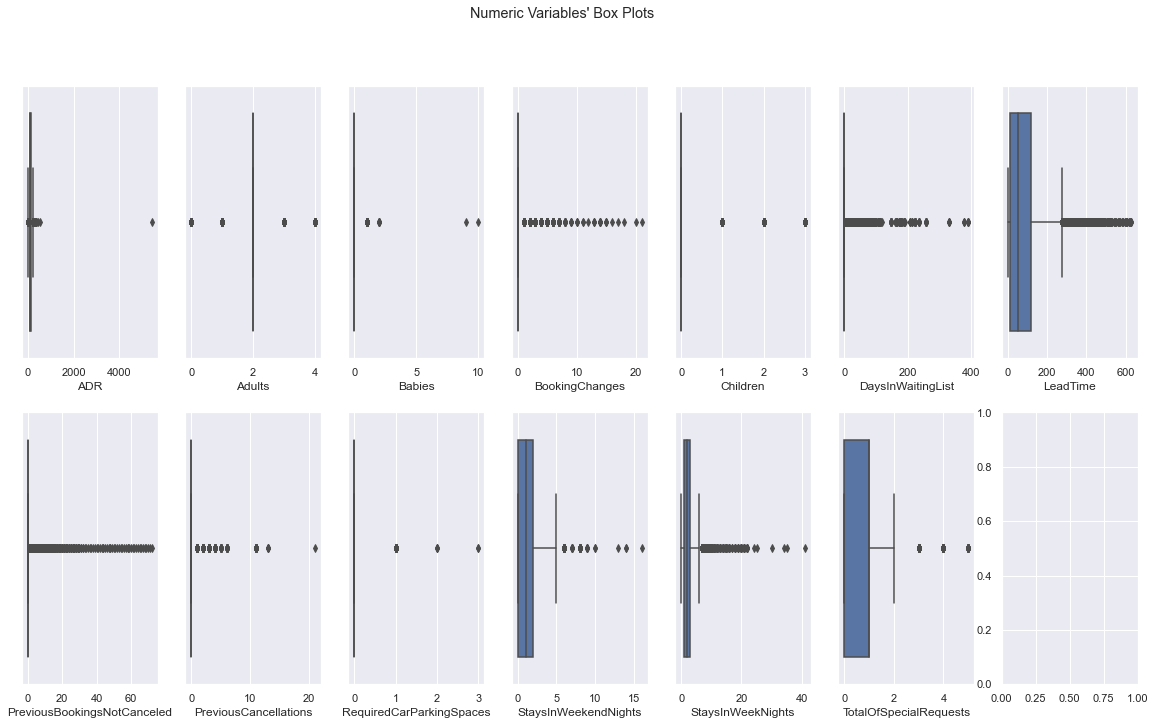

In [102]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=df[feat], ax=ax)

# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

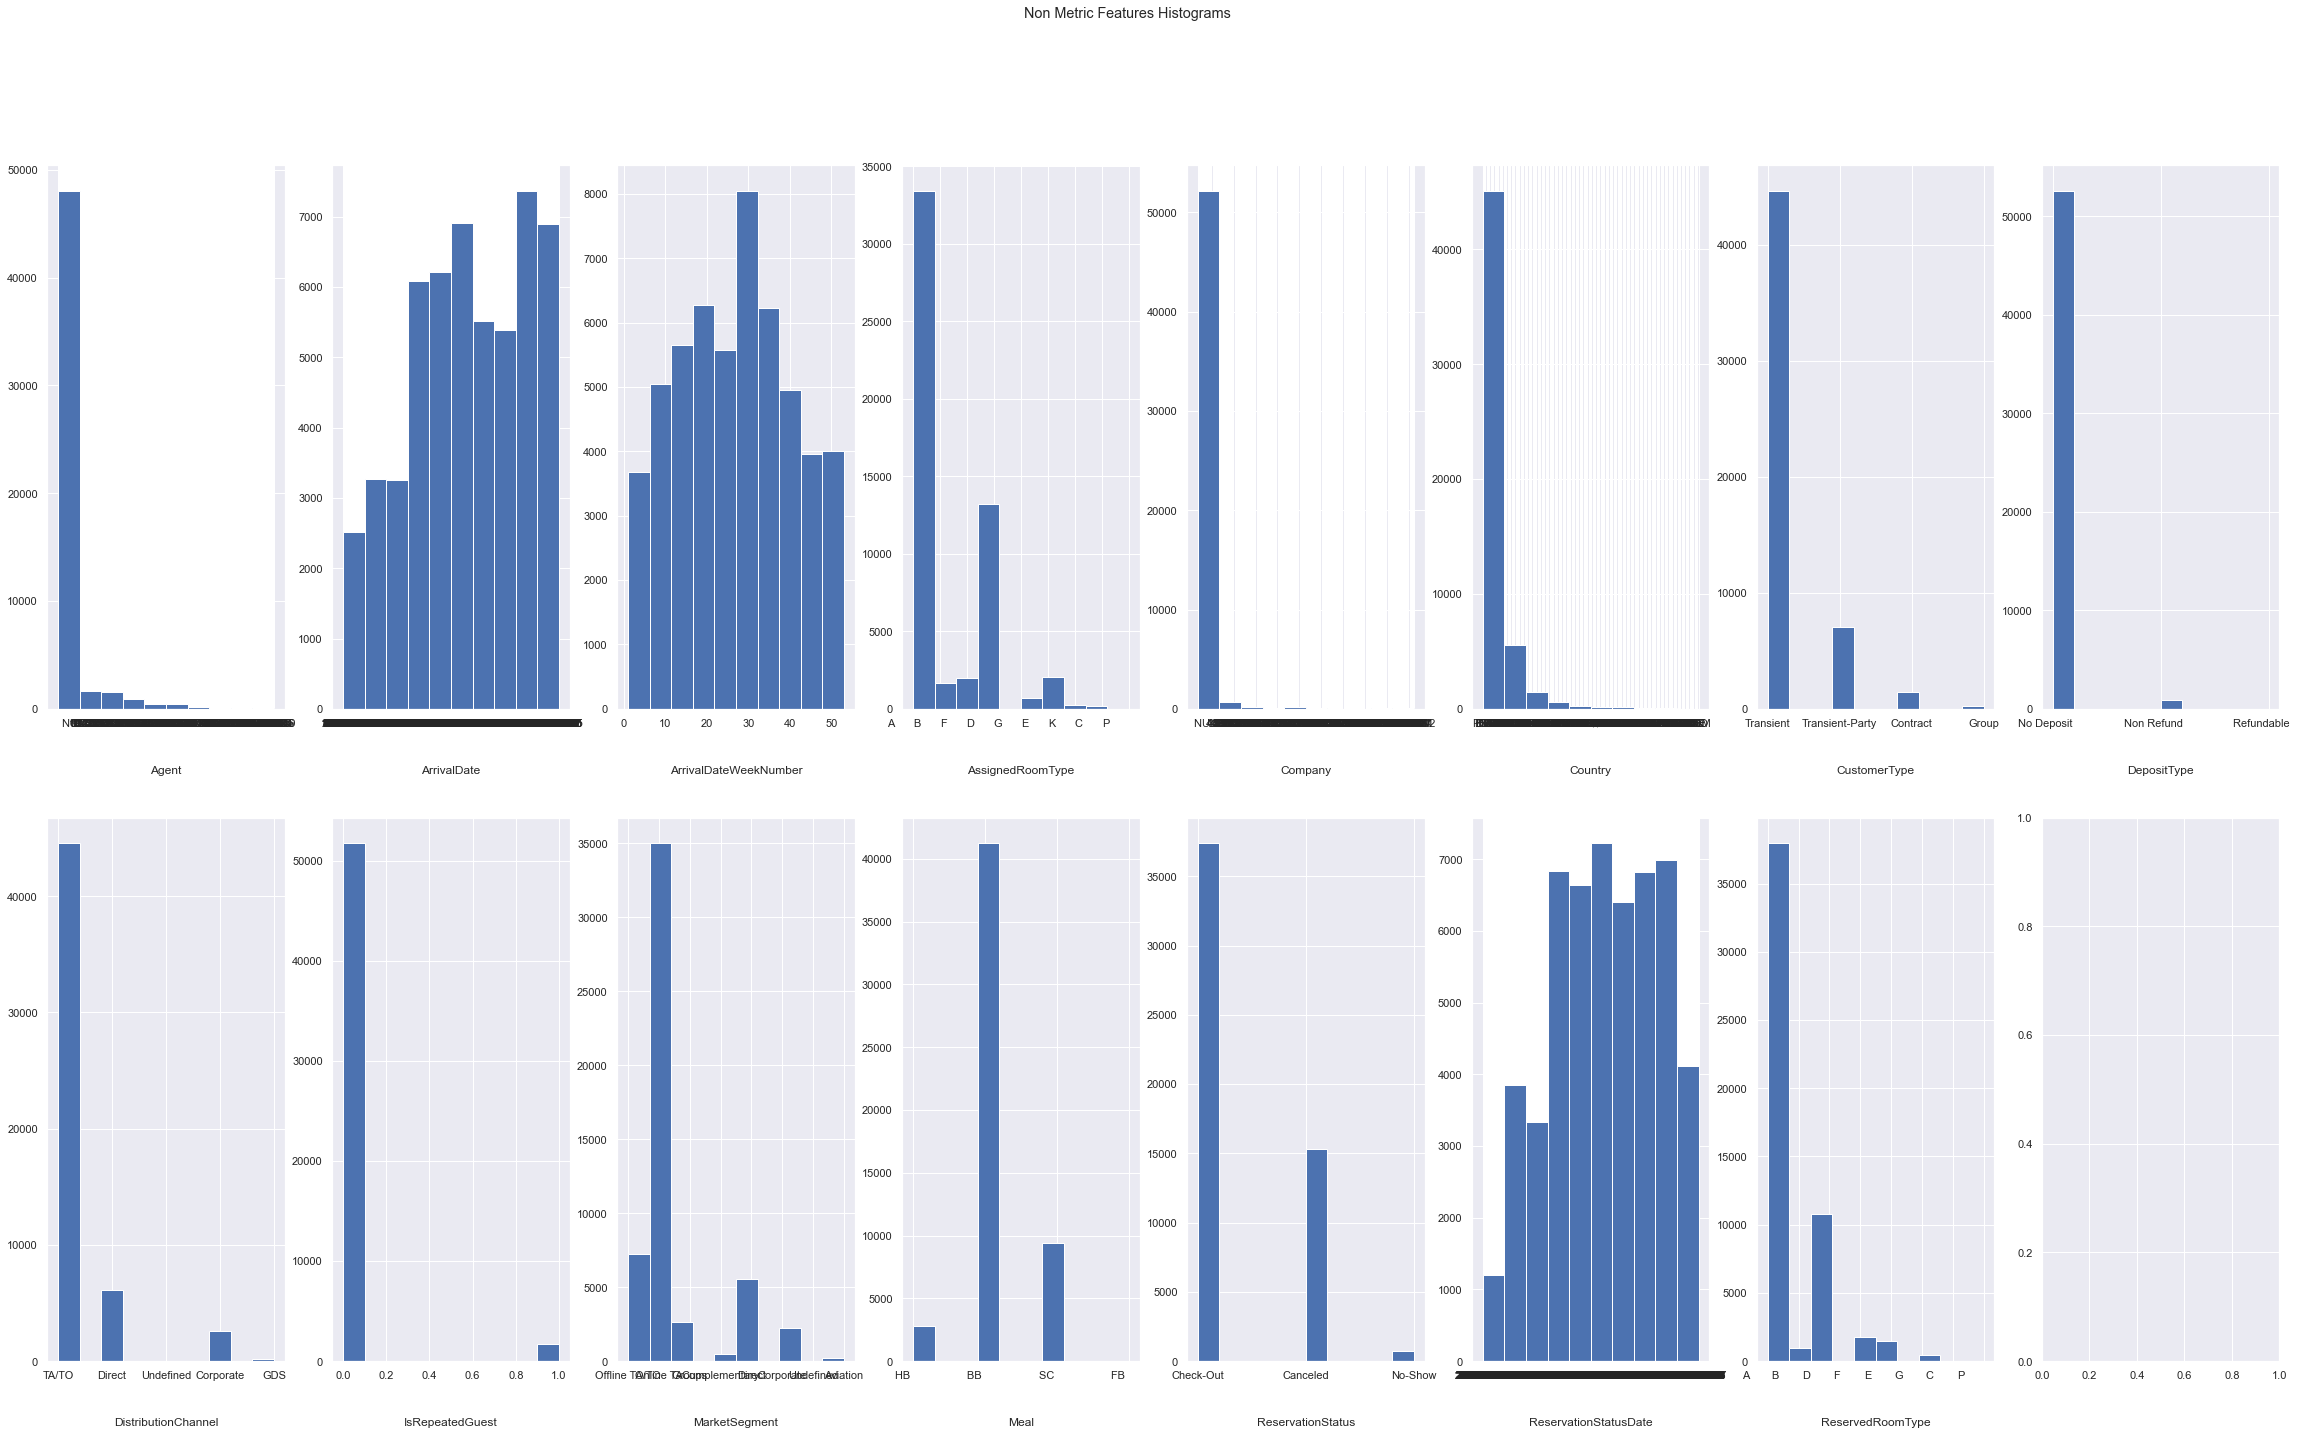

In [105]:
# Non Metric Features Histograms
sns.set()
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(40, 22))

for ax, feat in zip(axes.flatten(), non_metric_features):
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
title = "Non Metric Features Histograms"

plt.suptitle(title)

plt.show()